Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)
    
    
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


import warnings
warnings.filterwarnings("ignore")

In [4]:
#Impoting the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#Getting info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In this dataset all the data in interger form except ERA which score is in float.
By primary analysis it is observed that there is no null values present in dataset.

In [4]:
#Finding Null Values
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values are present in dataset

In [5]:
#Finding the shape
df.shape

(30, 17)

In this dataset there are 30 attributes & 17 columns (16 Features & one label )

In [6]:
#Checking the unoique values
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [8]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [9]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [7]:
#Describing the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# EDA

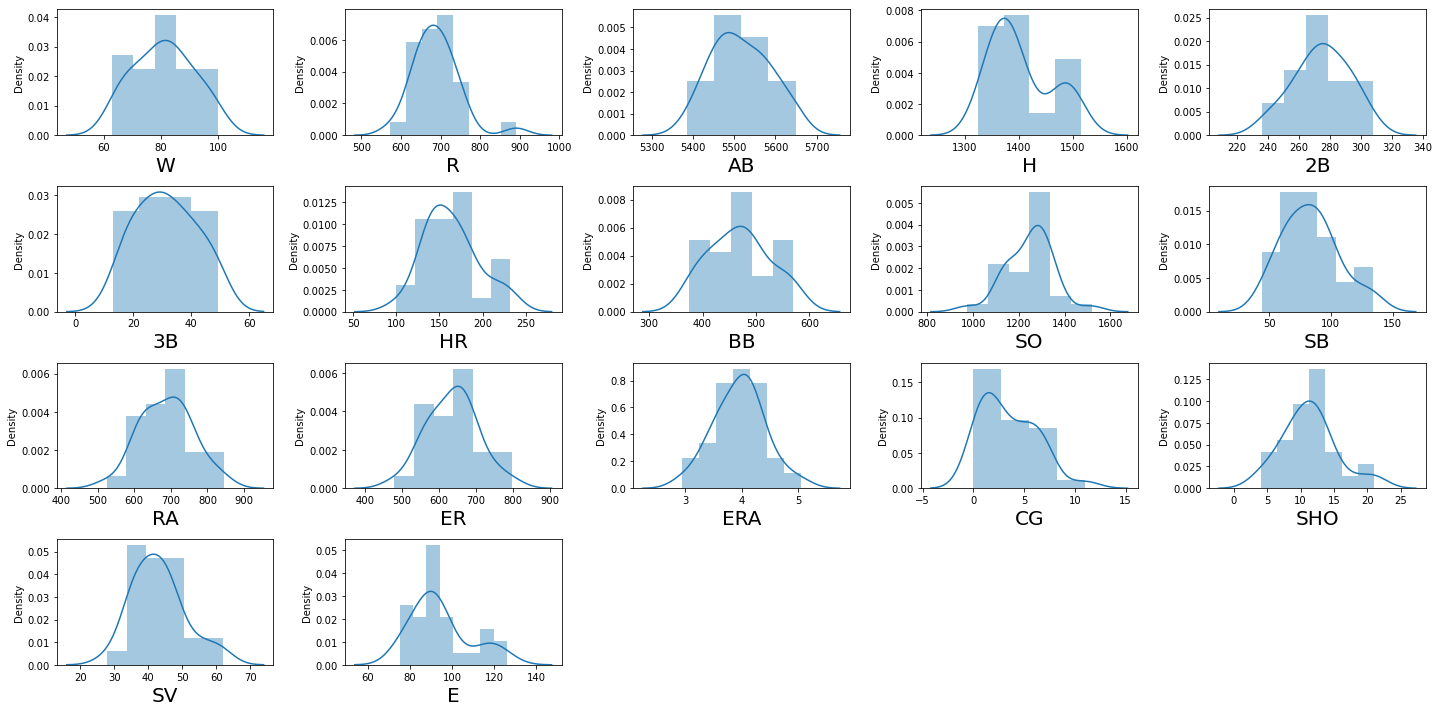

In [8]:
plt.figure(figsize=(20,10))
plotnumber=1


for column in df:
    if plotnumber<=17:
        ax=plt.subplot(4,5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [9]:
#Lets check outliers in dataset. First remove the label coloumn W from the dataset.
df_feature=df.drop("W", axis=1)

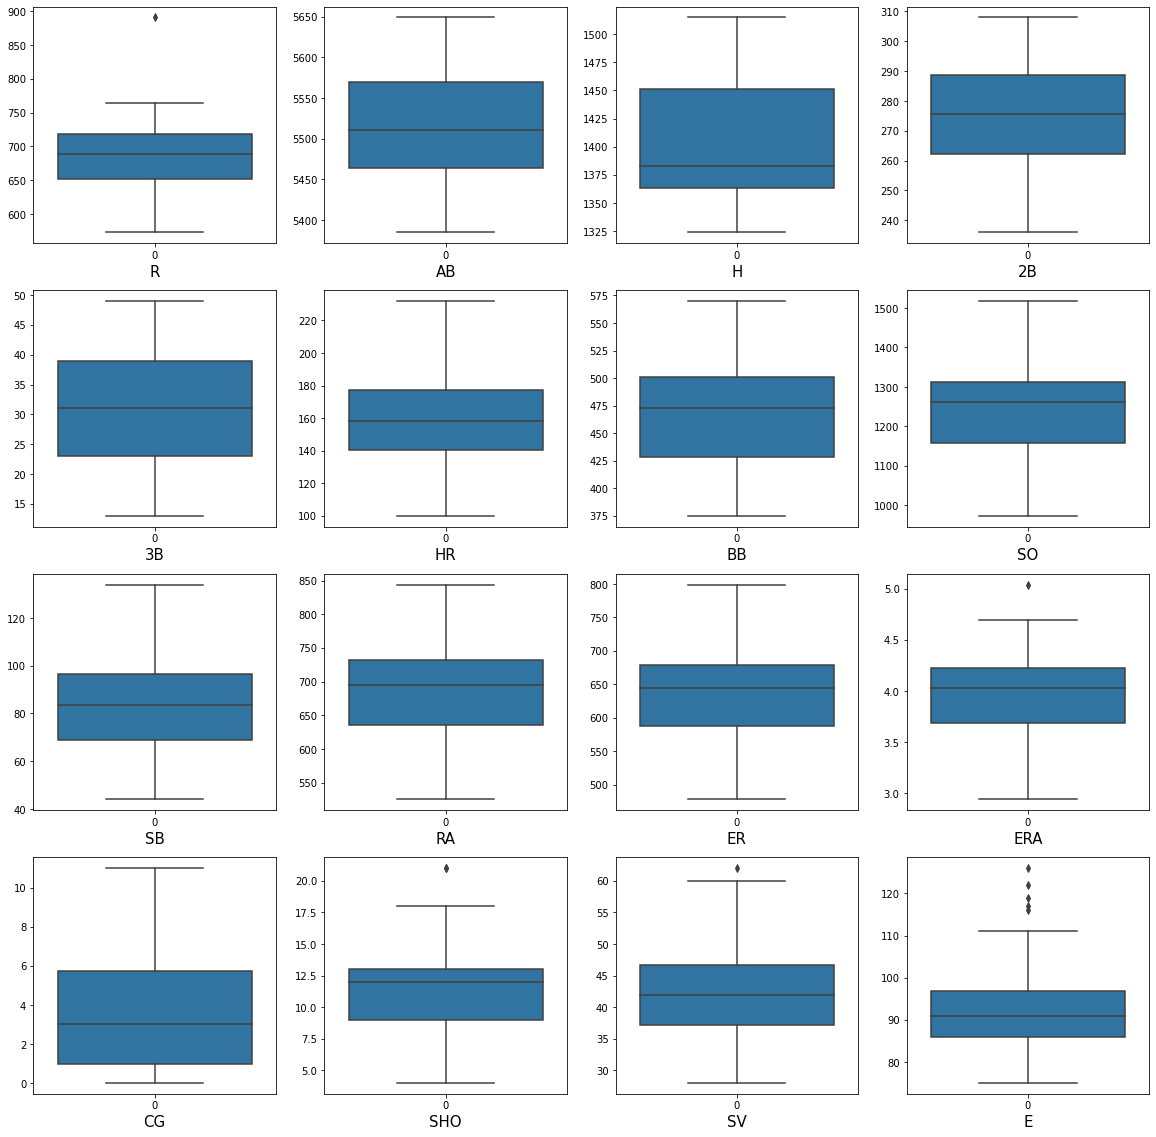

In [10]:
#Finding the outliers using boxplot

plt.figure(figsize=(20,20))
graph=1

for column in df_feature:
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column, fontsize=15)

    graph+=1

plt.show()

In [11]:
#Let us remove the outliers
#quantile 1
q1=df.quantile(0.25)

#3rd quantile
q3=df.quantile(0.75)

#IQR
IQR=q3-q1

In [12]:
def remove_outlier(df):
    sorted(df)
    Q1,Q3=np.percentile(df,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
for column in df:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

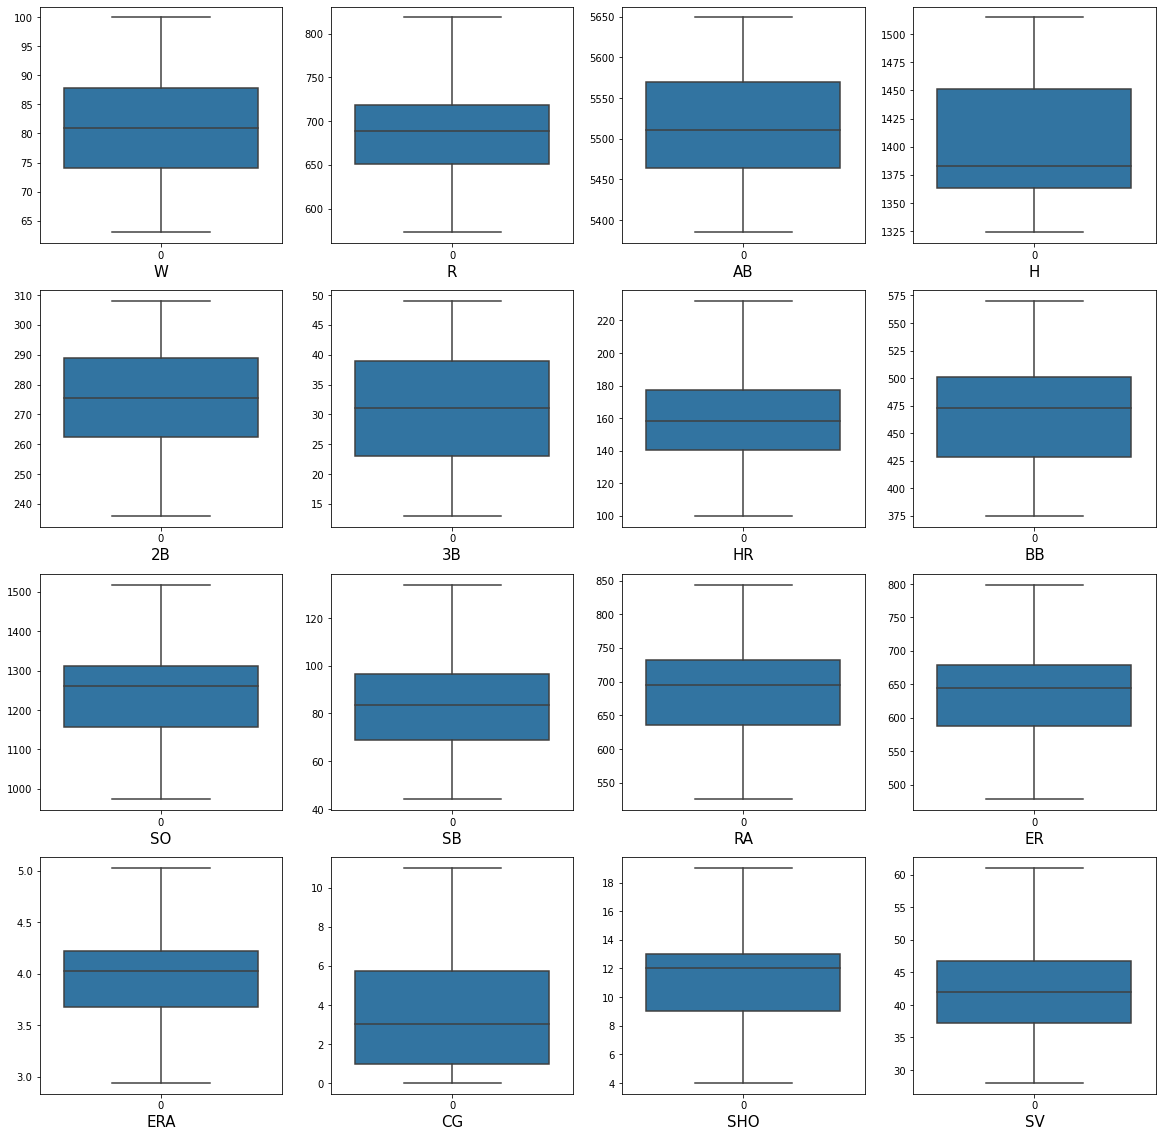

In [14]:
#Finding the outliers using boxplot

plt.figure(figsize=(20,20))
graph=1

for column in df:
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

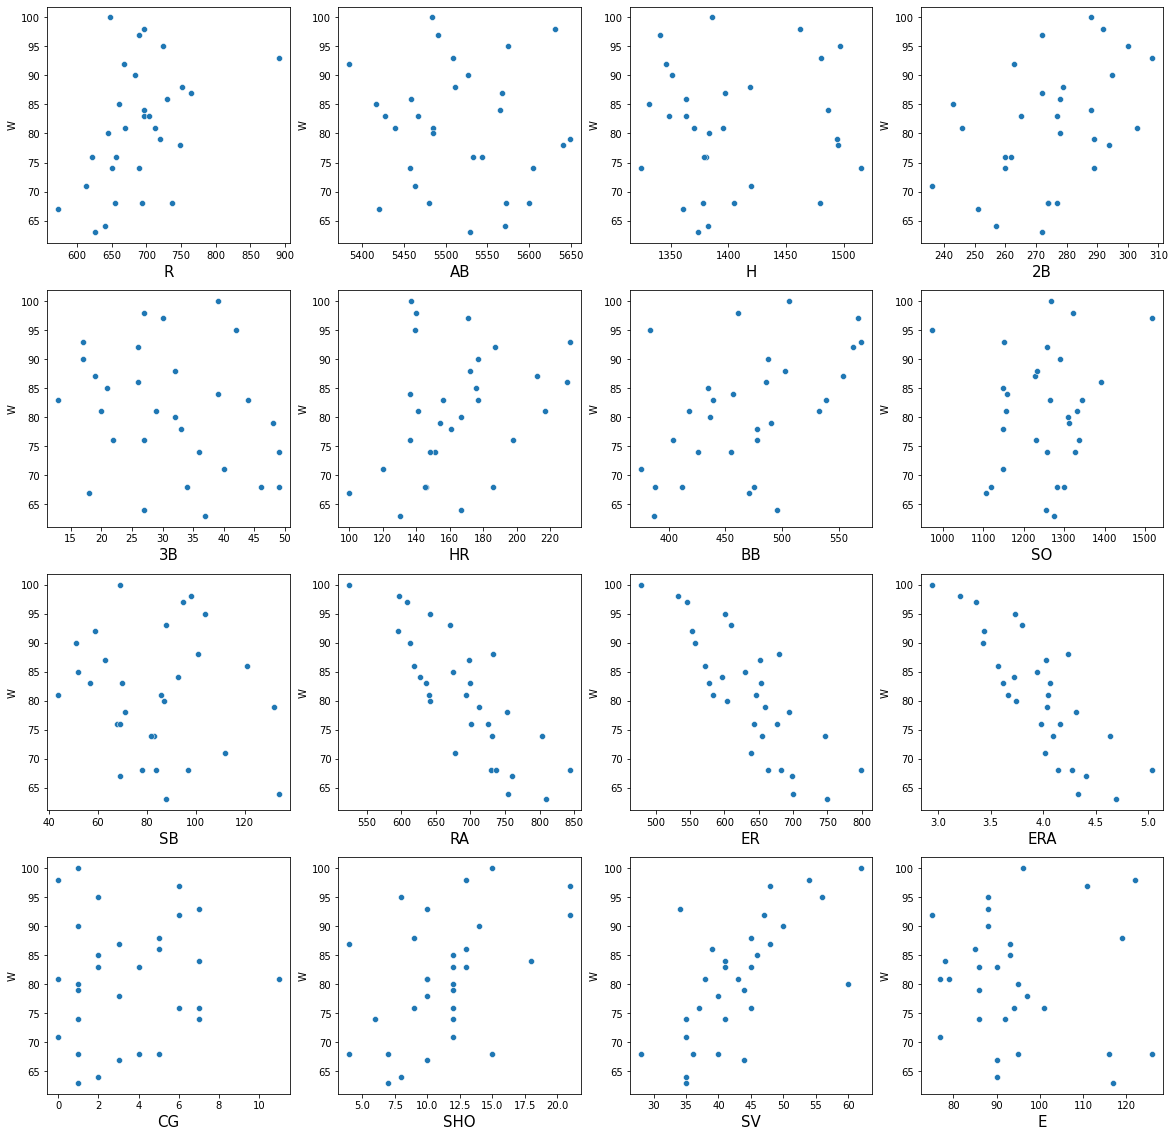

In [15]:
#Finding the outliers using boxplot

plt.figure(figsize=(20,20))
graph=1

for column in df_feature:
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.scatterplot(x=df_feature[column], y=df["W"])
        plt.xlabel(column, fontsize=15)
        
        
    graph+=1
    
plt.show()

# Let us check the correlation between the dataset using Heatmap

<AxesSubplot:>

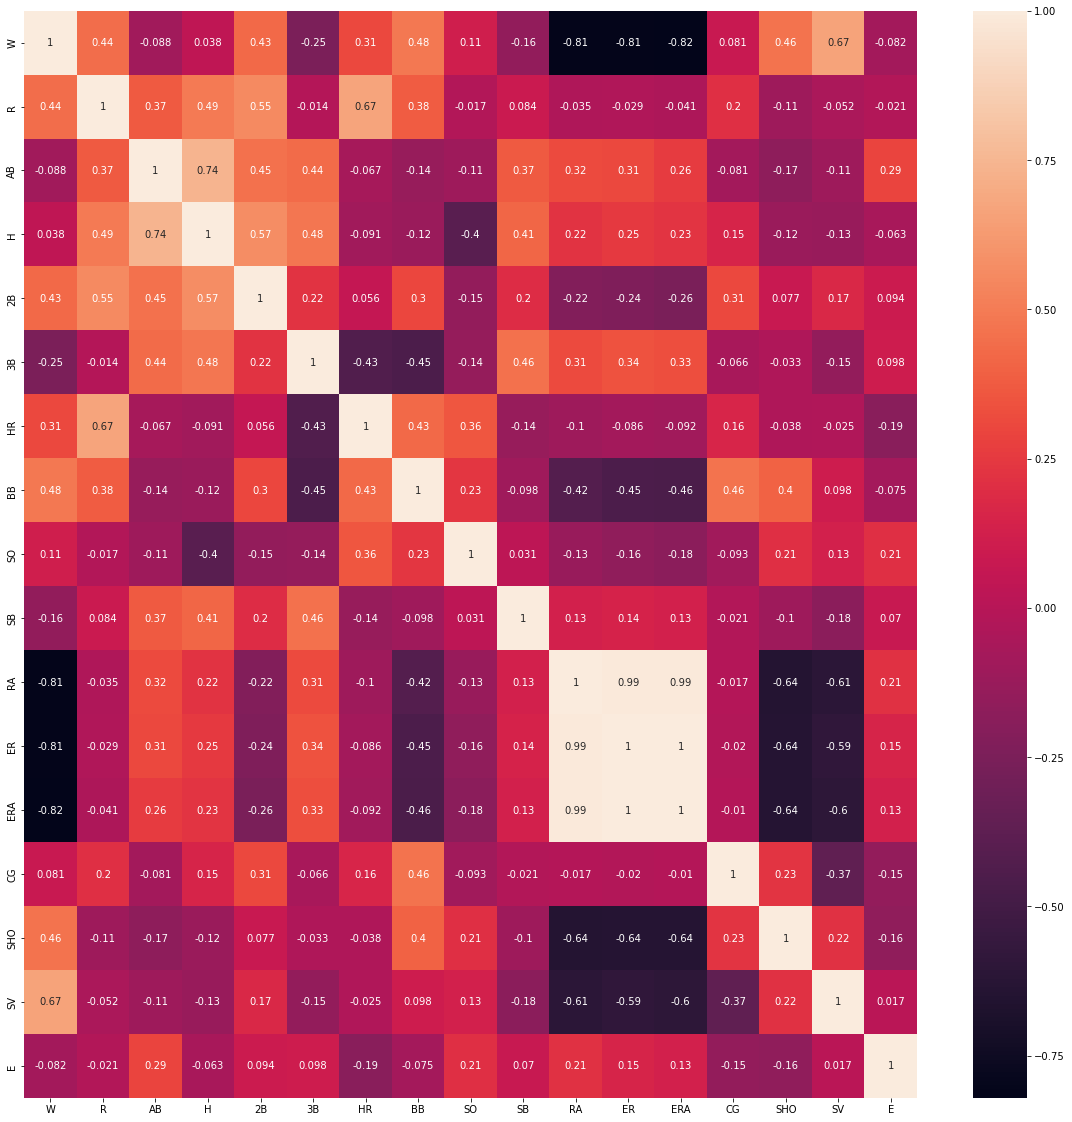

In [118]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Let us check the relationship between highest correlation H & AB with the help of scatterplot

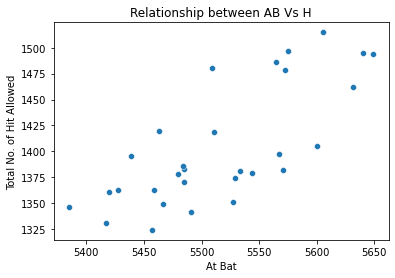

In [238]:
sns.scatterplot(x=df["AB"], y=df["H"])
plt.ylabel("Total No. of Hit Allowed")
plt.xlabel("At Bat")
plt.title("Relationship between AB Vs H")
plt.show()

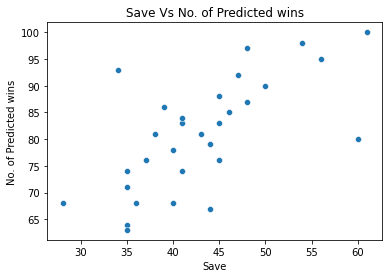

In [239]:
sns.scatterplot(x=df["SV"], y=df["W"])
plt.xlabel("Save")
plt.ylabel("No. of Predicted wins")
plt.title("Save Vs No. of Predicted wins")
plt.show()

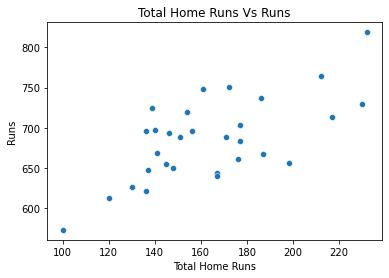

In [240]:
sns.scatterplot(x=df["HR"], y=df["R"])
plt.xlabel("Total Home Runs")
plt.ylabel("Runs")
plt.title("Total Home Runs Vs Runs")
plt.show()

# Scaling of dataset using Standard Scalar

In [11]:
x=df.drop(columns=["W", "RA", "ER"], axis=1)
y=df["W"]

In [12]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [13]:
#Finding Variance inflation factor to check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,10.987898,R
1,4.399954,AB
2,8.941874,H
3,3.729413,2B
4,3.142717,3B
5,7.882841,HR
6,3.468244,BB
7,2.155496,SO
8,1.819823,SB
9,4.951981,ERA


In [124]:
#Finding the shape of X
x_scaled.shape

(30, 14)

# Train Test Split

In [125]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

# Model Initialisation

# Using Linear Regression

In [126]:
#Initiate with linear regression model

lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [127]:
#Checking training score

lr.score(x_train, y_train)

0.9683424477815185

In [128]:
#Checking testing score

lr.score(x_test, y_test)

0.5824658071886717

In [129]:

y_pred=lr.predict(x_test)
y_pred

array([97.40548748, 88.56558757, 88.63452673, 61.94659853, 83.93185902,
       85.98853485, 91.43673612, 78.66009317])

In [130]:
pred_train=lr.predict(x_train)
pred_train

array([60.47908055, 72.6332563 , 65.26104747, 71.44055275, 83.17863634,
       92.0282368 , 86.82938642, 71.40053411, 76.4220361 , 80.70172773,
       79.47769744, 82.63264666, 96.53872211, 93.50166242, 98.9905124 ,
       68.00341609, 72.70522397, 82.494303  , 82.54639742, 84.90264042,
       85.50885539, 91.32342811])

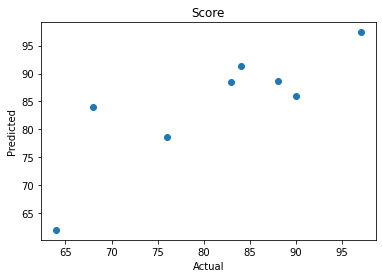

In [131]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

# Model Evaluation

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [133]:
y_pred= lr.predict(x_test)
y_pred

array([97.40548748, 88.56558757, 88.63452673, 61.94659853, 83.93185902,
       85.98853485, 91.43673612, 78.66009317])

In [134]:
#Mean square error
mean_absolute_error(y_test, y_pred)

4.837394587810076

In [135]:
#MSE
mean_absolute_error(y_test, y_pred)

4.837394587810076

In [136]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

6.782849612839594

In [137]:
r2_score(y_test, y_pred)

0.5824658071886717

# Cross Validation

In [181]:
cv_score=cross_val_score(lr, x_scaled, y, cv=4)
cv_score

array([0.49872787, 0.47756031, 0.83866218, 0.78077689])

In [182]:
cv_score.mean()

0.6489318120521198

# Lets predict the Baseball model No. of predicted wins using Linear regression

In [183]:
x.tail()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
25,667.0,5385.0,1346.0,263.0,26.0,187.0,563.0,1258.0,59.0,3.44000,6.0,19.0,47.0,75.0
26,696.0,5565.0,1486.0,288.0,39.0,136.0,457.0,1159.0,93.0,3.72000,7.0,18.0,41.0,78.0
27,720.0,5649.0,1494.0,289.0,48.0,154.0,490.0,1312.0,132.0,4.04000,1.0,12.0,44.0,86.0
28,650.0,5457.0,1324.0,260.0,36.0,148.0,426.0,1327.0,82.0,4.09000,1.0,6.0,41.0,92.0
29,737.0,5572.0,1479.0,274.0,49.0,186.0,388.0,1283.0,97.0,5.02625,4.0,4.0,36.0,95.0


In [184]:
y.tail()

25    92.0
26    84.0
27    79.0
28    74.0
29    68.0
Name: W, dtype: float64

In [185]:
print("No. of predicted wins ", lr.predict(scalar.transform([[667.0,5385.0,1346.0,263.0,26.0,187.0,563.0,1258.0,59.0,3.44000,6.0,19.0,47.0,75.0]])))

print("No. of predicted wins ", lr.predict(scalar.transform([[696.0,5565.0,1486.0,288.0,39.0,136.0,457.0,1159.0,93.0,3.72000,7.0,18.0,41.0,78.0]])))

No. of predicted wins  [92.0282368]
No. of predicted wins  [91.43673612]


# Save the model & use it for prediction using Linear Regression

In [186]:
#Saving the model in local file system 
import pickle

pickle.dump(lr, open("reg_model", "wb"))

In [187]:
#Prediction using the saved model
loaded_model=pickle.load(open("reg_model", "rb"))

a=loaded_model.predict(scalar.transform([[737.0,5572.0,1479.0,274.0,49.0,186.0,388.0,1283.0,97.0,5.02625,4.0,4.0,36.0,95.0]]))
a

array([68.00341609])

# Using Random Forest

In [188]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [189]:
#Checking training score

rf.score(x_train, y_train)

0.9410649729322278

In [190]:
#Checking testing score

rf.score(x_test, y_test)

0.4839334814344656

In [191]:

y_pred=rf.predict(x_test)
y_pred

array([75.03, 71.36, 77.93, 76.89, 71.8 , 81.01, 71.75, 80.34])

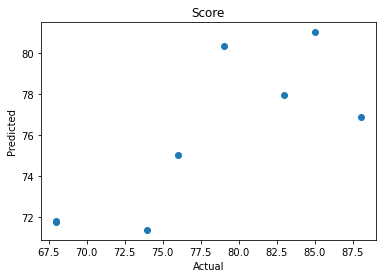

In [192]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [193]:
y_pred= rf.predict(x_test)
y_pred

array([75.03, 71.36, 77.93, 76.89, 71.8 , 81.01, 71.75, 80.34])

In [194]:
#Mean square error
mean_absolute_error(y_test, y_pred)

4.083749999999998

In [195]:
#MSE
mean_absolute_error(y_test, y_pred)

4.083749999999998

In [198]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

5.04065595929736

In [199]:
r2_score(y_test, y_pred)

0.4839334814344656

In [200]:
#Saving the model in local file system 
import pickle

pickle.dump(rf, open("reg_model1", "wb"))

In [201]:
#Prediction using the saved model
loaded_model=pickle.load(open("reg_model1", "rb"))

a=loaded_model.predict(scalar.transform([[737.0,5572.0,1479.0,274.0,49.0,186.0,388.0,1283.0,97.0,5.02625,4.0,4.0,36.0,95.0]]))
a

array([71.8])

# Cross Validation

In [202]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [203]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.25, random_state=20)

In [204]:
cv_score=cross_val_score(rf, x_scaled, y, cv=4)
cv_score

array([0.17880661, 0.23869927, 0.73483224, 0.63982234])

In [205]:
cv_score.mean()

0.44804011359902207

# Model initialisation using KNN

In [225]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [226]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [227]:
#Checking training score

knn.score(x_train, y_train)

0.6987480369744559

In [228]:
#Checking testing score

knn.score(x_test, y_test)

0.5936471922858761

In [230]:

y_pred=knn.predict(x_test)
y_pred

array([86.8, 84. , 78.4, 70.4, 73.2, 84.8, 79. , 69.6])

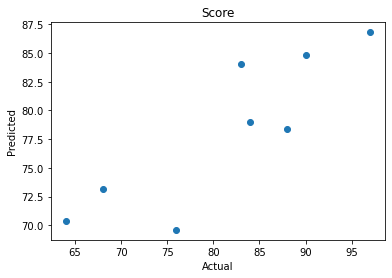

In [231]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [232]:
#Mean square error
mean_absolute_error(y_test, y_pred)

6.125000000000002

In [233]:
#MSE
mean_absolute_error(y_test, y_pred)

6.125000000000002

In [234]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

6.69141240695864

In [235]:
r2_score(y_test, y_pred)

0.5936471922858761

In [252]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [253]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.25, random_state=20)

In [254]:
cv_score=cross_val_score(knn, x_scaled, y, cv=4)
cv_score

array([0.09712834, 0.44336028, 0.56900241, 0.44410302])

In [256]:
cv_mean=cv_score.mean()
cv_mean

0.3883985121488703

# Saving Model & Use it for prediction using KNN

In [236]:
#Saving the model in local file system 
import pickle

pickle.dump(knn, open("reg_model3", "wb"))

In [237]:
#Prediction using the saved model
loaded_model=pickle.load(open("reg_model3", "rb"))

a=loaded_model.predict(scalar.transform([[737.0,5572.0,1479.0,274.0,49.0,186.0,388.0,1283.0,97.0,5.02625,4.0,4.0,36.0,95.0]]))
a

array([70.2])

# Lasso model

In [206]:
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001, .001,.01,.1,1,10],
           "random_state":list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [207]:
#So from lasso model we got best parameters hence we will tune on the basis

#Final training of model

ls=Lasso(alpha=1, random_state=0)
ls.fit(x_train, y_train)
ls_score_training=ls.score(x_train, y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

91.7505925162339

In [208]:
#Checking testing score

pred_ls=ls.predict(x_test)

In [209]:
lss=r2_score(y_test, pred_ls)
lss*100

59.619902907292364

In [210]:
cv_score=cross_val_score(ls,x, y,cv=4)
cv_mean=cv_score.mean()
cv_mean*100

41.887225538377024

# Save the model & Use further for prediction using Lasso model

In [212]:
#Saving the model in local file system 
import pickle

pickle.dump(ls, open("reg_model2", "wb"))

In [213]:
#Prediction using the saved model
loaded_model=pickle.load(open("reg_model2", "rb"))

a=loaded_model.predict(scalar.transform([[737.0,5572.0,1479.0,274.0,49.0,186.0,388.0,1283.0,97.0,5.02625,4.0,4.0,36.0,95.0]]))
a

array([65.35550298])

# Ada Boost Regressor

In [241]:
from sklearn.ensemble import AdaBoostRegressor

In [242]:
ada=AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [243]:
#Model Prediction on train data
y_pred=ada.predict(x_train)


In [244]:
accuracy=metrics.r2_score(y_train, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.9820877474565644


In [245]:
#Model Prediction on test data
y_pred=ada.predict(x_test)


In [246]:
accuracy=metrics.r2_score(y_test, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.6106069200226887


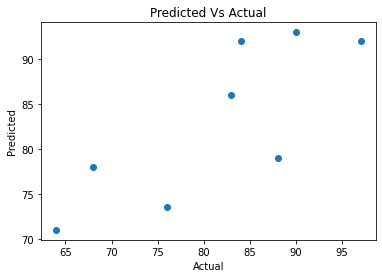

In [247]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted Vs Actual")
plt.show()

In [248]:
#Mean square error
mean_absolute_error(y_test, y_pred)

5.9375

In [249]:
#MSE
mean_absolute_error(y_test, y_pred)

5.9375

In [250]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

6.550286253286951

In [251]:
r2_score(y_test, y_pred)

0.6106069200226887

In [257]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [258]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.25, random_state=20)

In [261]:
cv_score=cross_val_score(ada, x_scaled, y, cv=4)
cv_score

array([0.23367962, 0.19194219, 0.75966437, 0.69650434])

In [262]:
cv_mean=cv_score.mean()
cv_mean

0.4704476318089204

-By above it is observed that we are getting very good R2 score, CV score in Linear Regression model.
-Hence we will use Linear regression model for prediction

# Final model Selection & Conclusion

In [215]:
loaded_model=pickle.load(open("reg_model", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

95.15892732499216


In [217]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])


In [218]:
conclusion

,0,1,2,3,4,5,6,7
Predicted,76.422036,71.440553,82.632647,88.634527,68.003416,84.90264,71.400534,79.477697
Original,76.000000,74.000000,83.000000,88.000000,68.000000,85.00000,68.000000,79.000000
